In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the file path
file_path = 'data/walmart_sales_data.csv'

# Load the CSV file
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"File not found. Please check the path: {file_path}")

# Displaying the first few rows of the dataset
df.head()


File loaded successfully!


,Date,Store_ID,Product_ID,Sales,Revenue,Stock_Level,Promotions,Holiday,Weather
0,2021-04-02,4,30,76,213.19,46,1,1,Rainy
1,2023-11-06,10,38,35,244.94,90,0,1,Sunny
2,2021-06-18,2,22,13,275.68,200,1,0,Cloudy
3,2021-08-21,1,44,97,383.46,176,0,1,Rainy
4,2024-02-13,7,46,75,33.61,48,1,1,Sunny


Non-numeric columns: Index([], dtype='object')


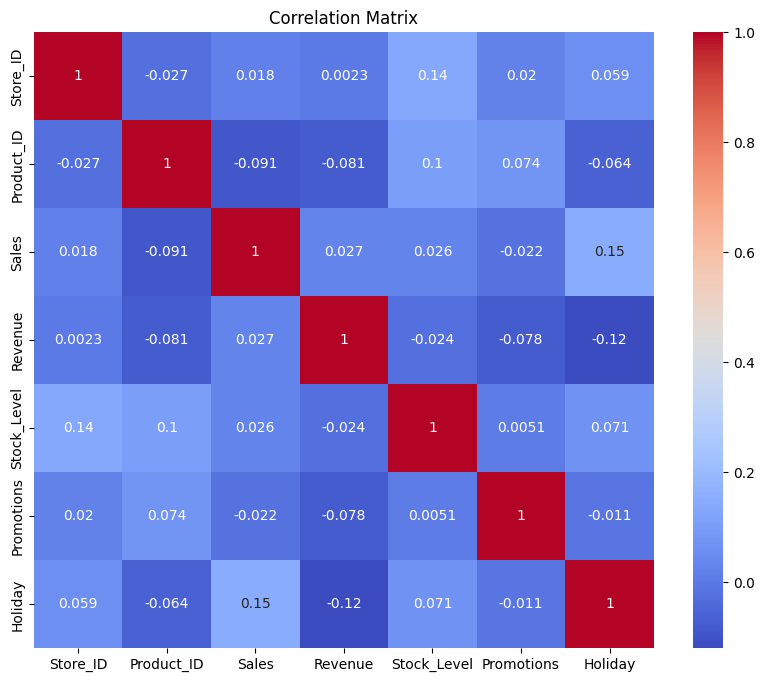

Missing values before handling:
Store_ID       0
Product_ID     0
Sales          0
Revenue        0
Stock_Level    0
Promotions     0
Holiday        0
dtype: int64


In [30]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f'Non-numeric columns: {non_numeric_columns}')

# Drop non-numeric columns or encode them
df_numeric = df.drop(non_numeric_columns, axis=1)

# Ensure 'Date' and 'Weather' columns are dropped before numeric operations because the non-numeric columns maynot drop
df = df.drop(['Date', 'Weather'], axis=1, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Checking for missing values
print('Missing values before handling:')
print(df.isnull().sum())

# Handling missing values (example: filling with median)
df.fillna(df.median(), inplace=True)

# Encoding categorical variables if needed
df = pd.get_dummies(df, drop_first=True)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [27]:
# Updating the dataframe with scaled features
df = pd.DataFrame(scaled_features, columns=df.columns)

# Print column names to debug
print(f"Columns in the dataframe: {df.columns.tolist()}")

# Defining the target variable and features
target_column_name = 'Sales'  # Replace 'Sales' with your target column

if target_column_name not in df.columns:
    raise KeyError(f"Target column '{target_column_name}' not found in the DataFrame. Available columns are: {df.columns.tolist()}")

X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

Columns in the dataframe: ['Store_ID', 'Product_ID', 'Sales', 'Revenue', 'Stock_Level', 'Promotions', 'Holiday']


In [28]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test set
y_pred = model.predict(X_test)

# Calculating RMSE and R² score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Root Mean Squared Error: 0.9435061547593921
R² Score: -0.03538678827908104


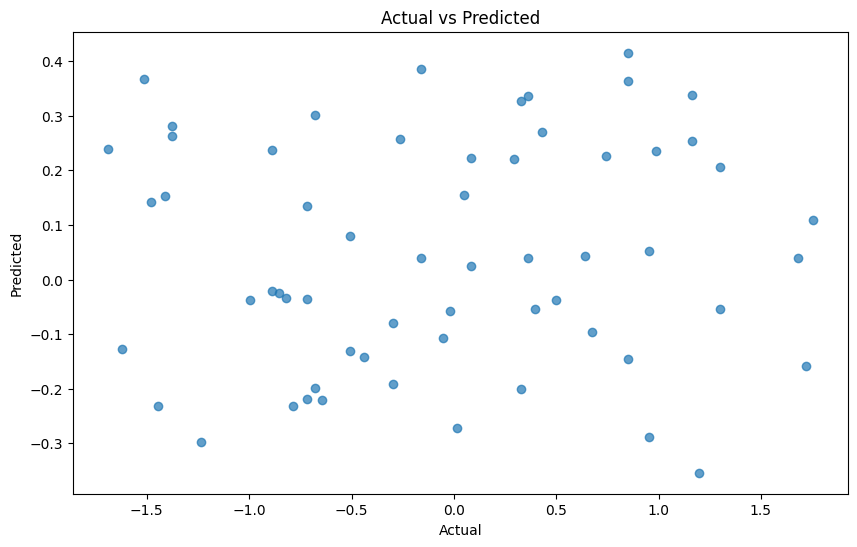

Missing values after handling:
Store_ID       0
Product_ID     0
Sales          0
Revenue        0
Stock_Level    0
Promotions     0
Holiday        0
dtype: int64
             Store_ID  Product_ID     Sales   Revenue  Stock_Level  \
Store_ID     1.000000   -0.027472  0.018330  0.002337     0.136918   
Product_ID  -0.027472    1.000000 -0.090923 -0.080537     0.104945   
Sales        0.018330   -0.090923  1.000000  0.026974     0.025728   
Revenue      0.002337   -0.080537  0.026974  1.000000    -0.024456   
Stock_Level  0.136918    0.104945  0.025728 -0.024456     1.000000   
Promotions   0.020412    0.074125 -0.021990 -0.077658     0.005100   
Holiday      0.059288   -0.063862  0.151100 -0.119975     0.071447   

             Promotions   Holiday  
Store_ID       0.020412  0.059288  
Product_ID     0.074125 -0.063862  
Sales         -0.021990  0.151100  
Revenue       -0.077658 -0.119975  
Stock_Level    0.005100  0.071447  
Promotions     1.000000 -0.010710  
Holiday       -0.010710 

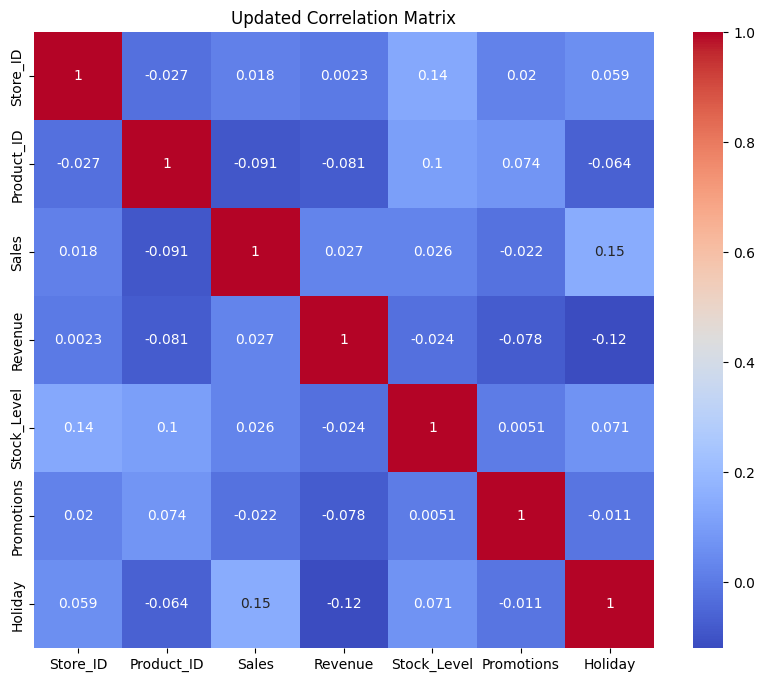

In [29]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Check for missing values after preprocessing
print('Missing values after handling:')
print(df.isnull().sum())

# Remove duplicate rows if any
df = df.drop_duplicates()

# Recalculate and display the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Updated Correlation Matrix')
plt.show()